In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.metrics import r2_score

<AxesSubplot:xlabel='Date'>

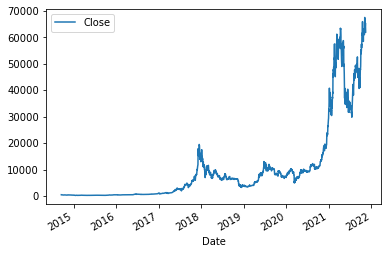

In [2]:
df = yf.Ticker('BTC-USD').history("Max")
df = pd.DataFrame(df['Close'])
df.plot()

In [3]:
df['lstdiff'] = df['Close'].diff()

<AxesSubplot:xlabel='Date'>

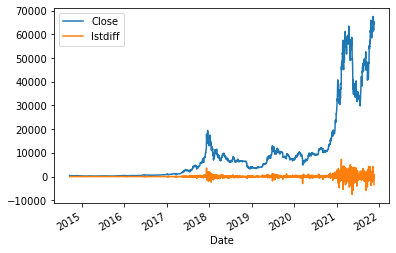

In [4]:
df.plot()

In [5]:
df['LogClose'] = np.log(df['Close'])

<AxesSubplot:xlabel='Date'>

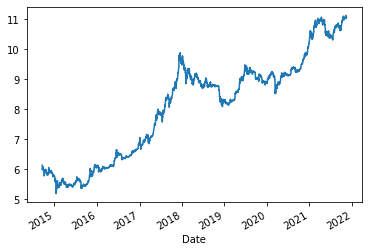

In [6]:
df['LogClose'].plot()

In [7]:
from statsmodels.tsa.arima.model import ARIMA

In [8]:
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2021-11-06', '2021-11-07', '2021-11-08', '2021-11-09',
               '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-13',
               '2021-11-14', '2021-11-16'],
              dtype='datetime64[ns]', name='Date', length=2613, freq=None)

In [9]:
# df.index.freq = 'D'

In [10]:
Ntest = 30 
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [11]:
train_idx = df.index <= train.index[-1]
test_idx = df.index >= train.index[-1]

In [12]:
arima = ARIMA(train['Close'], order = (1, 0, 0))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [13]:
arima_result = arima.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [14]:
df.loc[train_idx, 'AR(1)'] = arima_result.predict(
    start=train.index[0], end = train.index[-1])

<AxesSubplot:xlabel='Date'>

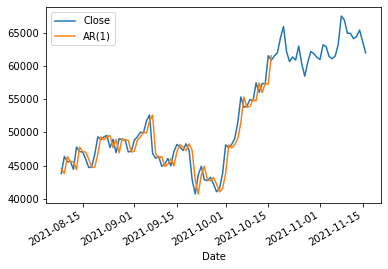

In [15]:
df[-100:][['Close', 'AR(1)']].plot()

In [16]:
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
df.loc[test_idx, 'AR(1)'] = forecast

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='Date'>

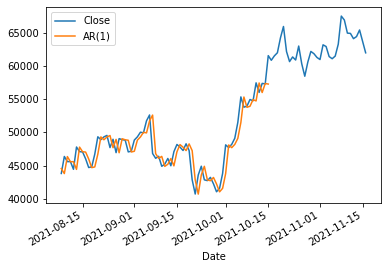

In [17]:
df[-100:][['Close', 'AR(1)']].plot()

In [18]:
# Explore prediction result further
type(prediction_result)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [19]:
#Confidence interval
prediction_result.conf_int()

,lower Close,upper Close
2583,59478.622055,62264.307764
2584,58881.377560,62820.139378
2585,58418.556453,63241.564270
2586,58025.365865,63593.375304
2587,57676.703280,63900.674989
2588,57359.691876,64176.340140
2589,57066.680635,64428.021769
2590,56792.683463,64660.705962
2591,56534.236294,64877.856780
2592,56288.816441,65081.996902


In [81]:
def plot_fit_and_forecast(result):
    fig, ax = plt.subplots(figsize = (15, 5))
    ax.plot(df[-130:]['Close'], label = 'data')
    
    # plot the curve fitted on train set
    train_pred = result.fittedvalues
    ax.plot(train.index[-100:], train_pred[-100:], color = 'green', label = 'fitted')
    
    #forecast the test set
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int['lower Close'], conf_int['upper Close']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label = 'forecast')
    ax.fill_between(test.index,\
                   lower, upper,\
                   color='red',alpha = 0.3)
    ax.legend()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


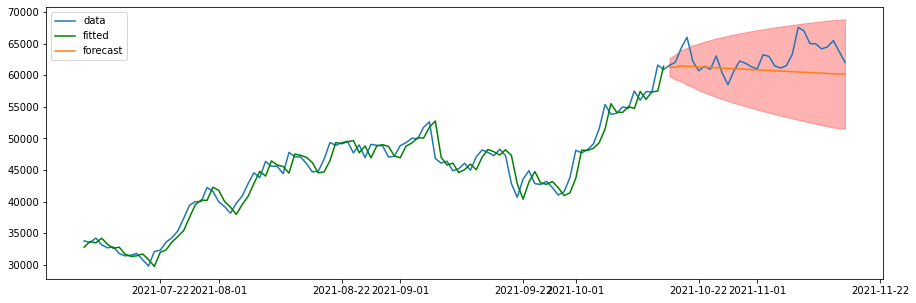

In [82]:
plot_fit_and_forecast(arima_result)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive paramet

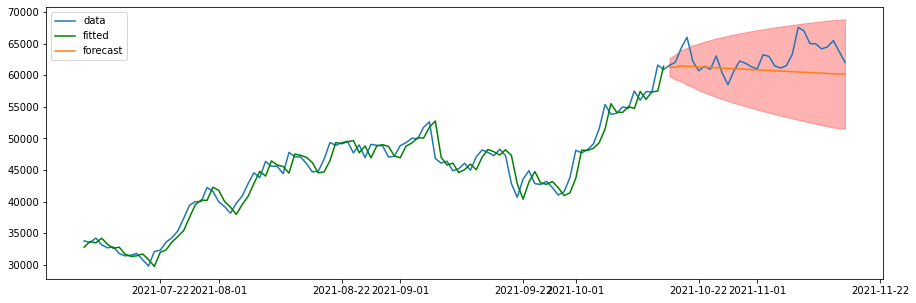

In [83]:
arima = ARIMA(train['Close'], order = (8,0,0))#AR(10)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

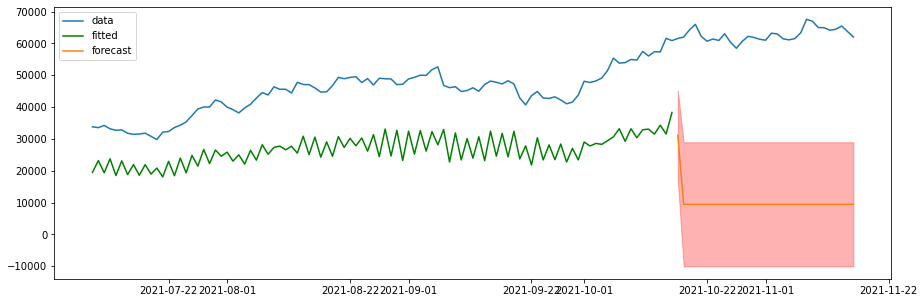

In [84]:
arima = ARIMA(train['Close'], order = (0,0,1)) #MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

In [73]:
df['LoglstDiff'] = df['LogClose'].diff()

<AxesSubplot:xlabel='Date'>

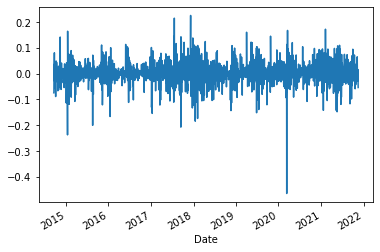

In [74]:
df['LoglstDiff'].plot()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

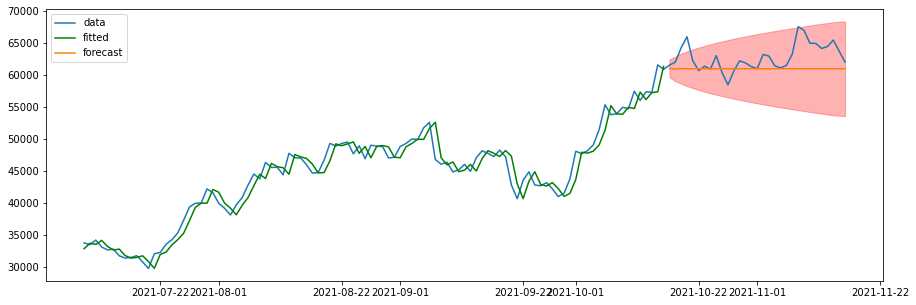

In [90]:
arima = ARIMA(train['Close'], order = (1,1,1))
arima_result_111 = arima.fit()

def plot_fit_and_forecast_int(result, d, col = 'Close'):
    fig, ax = plt.subplots(figsize = (15, 5))
    ax.plot(df[-130:]['Close'], label = 'data')
    
    # plot the curve fitted on train set
    train_pred = result.predict(start=train.index[d], end= train.index[-1])
    ax.plot(train.index[-100:], train_pred[-100:], color = 'green', label = 'fitted')
    
    #forecast the test set
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label = 'forecast')
    ax.fill_between(test.index,\
                   lower, upper,\
                   color='red',alpha = 0.3)
    ax.legend()

plot_fit_and_forecast_int(arima_result_111,1)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

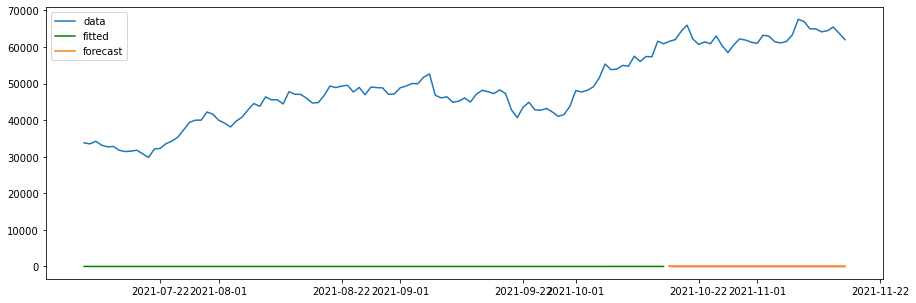

In [97]:
arima = ARIMA(train['LogClose'], order = (1,1,1))
arima_result_log111 = arima.fit()
plot_fit_and_forecast_int(arima_result_log111,1,col='LogClose')